<a href="https://colab.research.google.com/github/ryan-keenan/Data-C4/blob/master/Rideshare_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rideshare Project Part 3
<img src="https://data.cityofchicago.org/api/assets/73F1665C-0FE6-4183-8AD1-E91DB8EFAFA4?7CB02402-8E06-48B0-8C9A-3890182D58C7.png" width=400 alt="Drawing" style="width: 200px;"/>

The city of Chicago has hired you as an analyst to dive into their recently published a dataset containing detailed information about all rides taken with rideshare providers like Uber and Lyft in Chicago and surrounding areas From November 2018 through March 2019.

The dataset you'll first be investigating in this notebook is the same one you looked at in the Google Sheets lab, comprising two weeks worth of data from Dec. 21, 2018 to Jan. 3, 2019. After that you'll work with a larger dataset of roughly 90k randomly sampled records. Both datasets have been downsampled by a factor of 500 to reduce the size, meaning that only every 500th record from this time period in the original dataset is included here. 

*Note: Some columns of unnessary or redundant information have been removed from the original data set and columns for Year, Month, Weekday and Hour of Day have been added for convenience. The original published data was anonymized by rounding off dollar amounts and times of day. To make the data more realistic looking we have added random noise to the Fare, Tip, Latitude and Longitude columns.*

**The first few steps of this project (reading in the data, removing null values and investigating descriptive statistics) are the same as for parts 1 and 2 of this project.**

### Scenario for this section of the project:
> The city of Chicago now wants you create a model for predicting the number of rides per day and per hour. Your goal is to create a model that the city can use to estimate the economic impact of rideshare activities over time. Follow along in this notebook to create your model! 

## Objectives for this Python lab:
Some of the steps you will complete in this lab are effectively the same as you did in the Google Sheets lab, but now in a Python environment. Other steps are completely new. The overlap between this lab and the previous Sheets lab is intended to show you how some things work in Python that you're already familiar with in Sheets, and the new steps are to demonstrate where Python allows you to easily do things that would be very difficult or impossible in Sheets. Here are your objectives for this lab:

1. Read in the dataset and compute summary statistics.

2. Create a model of daily rideshare usage.

3. Create a model of hourly rideshare usage.

The code for all these objectives is already written for you. All you need to do is press "Shift+Enter" on your keboard after selecting each cell to run the code. <mark>Be sure to run all the cells in order because some of the steps need to happen in a sequence</mark>. At a few points we give suggestions for making simple modifications to the code. Feel free to experiment with more if you're feeling curious!

### Objective 1: Read in the dataset and compute summary statistics.

#### 1.1 Investigate the data source (if you haven't already).

As always, a great first step before you jump into your analysis is to check out the source of your data. You can find out more about this exciting dataset [here](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p/data).

#### 1.2 Import all the relevant Python packages.

Run the next cell to import Python packages

In [0]:
# Import the pandas library for reading and manipulating your data
# Anywhere you see "pd" in this notebook it's a reference to the pandas library
import pandas as pd
# Extra step to ensure that pandas plays nice with matplotlib
pd.plotting.register_matplotlib_converters()
# Import the numpy library for running calculations on your data
# Anywhere you see "np" in this notebook it's a reference to the numpy library
import numpy as np
# Import some components of the matplotlib library for plotting your data
# Anywhere you see "plt" or "mpimg" in this notebook it's a reference to the "pyplot" and "image" packages from matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Import seaborn library for making your plots pretty!
# Anywhere you see "sns" in this notebook it's a reference to the seaborn library
import seaborn as sns
# Set some default plotting parameters using seaborn
sns.set()


#### 1.3 Read in the dataset.

With the code below, you will use the `pandas` code library to read a csv (comma separated value) file containing your data into an object called "`df`". In this case, `df` is short for dataframe, which is a type of object used for storing rows and columns of data.

Run the following cell (select and press play or "Shift+Enter" on the keyboard) to complete this step. 



In [0]:
# Read the data into a dataframe called "df".
url = "https://raw.githubusercontent.com/ryan-keenan/Data-C4/master/rideshare_holidays.csv"
df = pd.read_csv(url, parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

#### 1.4 Inspect the dataset.

Run the following cell to look at the column names and first few rows of your data. Be sure to scroll to the right to see all the columns. 

You can explore the [city of Chicago website for this dataset](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p/data) further to learn more about each column.

In [0]:
# Print the column names and first five rows of the dataset contained in df
# Note: to look at more than 5 rows just enter a number in the parentheses e.g., "df.head(10)"
df.head()

,Trip Start Timestamp,Trip ID,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Weekday,Hour of Day
0,2018-12-21 00:15:00,205df3934c192419191fee0cd59d937e428ce943,2018-12-21 00:15:00,179.0,0.8,6.0,6.0,3.355505,0.0,2.5,5.855505,False,1,41.943193,-87.652933,41.934605,-87.647185,2018,12,Friday,0
1,2018-12-21 00:15:00,21e57f6045a88120fb44ed6e5f3ef3056ec49397,2018-12-21 00:15:00,405.0,0.8,8.0,8.0,5.372322,0.0,2.5,7.872322,False,1,41.893997,-87.619736,41.892972,-87.612612,2018,12,Friday,0
2,2018-12-21 00:15:00,571289f1acbfc37f0f6cc7374521b6925a68fe17,2018-12-21 00:30:00,312.0,0.9,8.0,32.0,12.564570,0.0,3.8,16.364570,False,1,41.892318,-87.632273,41.877202,-87.620371,2018,12,Friday,0
3,2018-12-21 00:15:00,32a2fc1023c5fed0cb7170783b6d5ef62bfa2803,2018-12-21 00:30:00,373.0,1.4,6.0,5.0,5.293349,0.0,3.0,8.293349,False,1,41.945562,-87.654244,41.951144,-87.684893,2018,12,Friday,0
4,2018-12-21 00:15:00,71545f540b6681e7f7ecf2b1ac6c96c1c2d12f92,2018-12-21 00:45:00,1165.0,5.2,8.0,6.0,8.312059,0.0,4.0,12.312059,True,3,41.908317,-87.635508,41.956913,-87.666823,2018,12,Friday,0


#### 1.4 Explore column data types and the presence of null / missing values.

In the cells below, running `df.shape` prints out the shape of the dataset and `df.info()` prints out each column name along with the total number of non-null values in that column and its data type. Investigate the output and see what you find!

In [0]:
# Display the shape of this dataset
df.shape

(6572, 21)

In [0]:
# Print information about the total number of non-null values and data types in each column of your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6572 entries, 0 to 6571
Data columns (total 21 columns):
Trip Start Timestamp          6572 non-null datetime64[ns]
Trip ID                       6572 non-null object
Trip End Timestamp            6572 non-null datetime64[ns]
Trip Seconds                  6572 non-null float64
Trip Miles                    6572 non-null float64
Pickup Community Area         6137 non-null float64
Dropoff Community Area        6094 non-null float64
Fare                          6572 non-null float64
Tip                           6572 non-null float64
Additional Charges            6572 non-null float64
Trip Total                    6572 non-null float64
Shared Trip Authorized        6572 non-null bool
Trips Pooled                  6572 non-null int64
Pickup Centroid Latitude      6143 non-null float64
Pickup Centroid Longitude     6143 non-null float64
Dropoff Centroid Latitude     6098 non-null float64
Dropoff Centroid Longitude    6098 non-null float64
Y

#### 1.5 Handle missing values

 If there are null/missing values in your data, you will sometimes want to eliminate those rows from the dataset, or change them to an acceptable value. In some cases, null values may be interesting to explore further. For this project, you can choose to simply leave the null values alone or remove records with null values. 

---

If you want to remove all records containing null values, make a note of why you've decided to do this and then run the next cell after removing the "#" from the beginning of the line that says `df.dropna(inplace=True)` to drop all rows containing null values. If you choose not to remove missing values you can skip the next cell. 

In [0]:
# Remove all rows that contain any null values
#df.dropna(inplace=True) 
# Print information about the total number of non-null values and data types in each column of your dataframe
#df.info()

#### 1.6 Investigate summary statistics.

Run the cell below to compute and display summary statistics for your dataset. The output will be a table containing the count, mean, standard deviation, min, max and 25%, 50% (median) and 75% (Q1-Q3) quartiles for all columns. 

In [0]:
# Print out summary statistics for all columns
df.describe()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Hour of Day
count,6572.000000,6572.000000,6137.000000,6094.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6143.000000,6143.000000,6098.000000,6098.000000,6572.000000,6572.000000,6572.000000
mean,984.649726,6.041464,25.078051,25.864621,11.527415,0.623478,3.080157,15.231050,1.274194,41.891893,-87.666306,41.893166,-87.668781,2018.225198,9.522824,13.295648
std,661.072357,6.551493,20.224738,20.680509,8.901855,1.704084,1.858867,10.499637,0.674322,0.063000,0.057941,0.062589,0.063210,0.417744,4.595187,6.608478
min,67.000000,0.000000,1.000000,1.000000,0.019438,0.000000,0.000000,0.700983,1.000000,41.649067,-87.915590,41.649354,-87.915528,2018.000000,1.000000,0.000000
25%,505.750000,1.800000,8.000000,8.000000,5.883585,0.000000,2.500000,8.764584,1.000000,41.875980,-87.683859,41.877700,-87.684682,2018.000000,12.000000,9.000000
50%,818.000000,3.700000,24.000000,24.000000,8.603869,0.000000,3.000000,11.989529,1.000000,41.897210,-87.653495,41.897027,-87.652287,2018.000000,12.000000,14.000000
75%,1300.000000,7.500000,32.000000,32.000000,13.411816,0.000000,3.050000,17.409890,1.000000,41.930616,-87.631441,41.933172,-87.631603,2018.000000,12.000000,19.000000
max,6472.000000,83.500000,77.000000,77.000000,121.016974,30.500000,15.300000,123.816974,6.000000,42.022373,-87.534121,42.020109,-87.533848,2019.000000,12.000000,23.000000


### Objective 2: Create a model of daily rideshare usage

The dataset you're working with contains a sampling (one out of every 500) of rides over the 2018/2019 holiday season (Dec. 21, 2018 through Jan. 3, 2019). Your first step toward creating a model of rideshare usage over time will be to simply calculate the average number of rides per day over this holiday period.

#### 2.1 Calculate average rides per day

Run the cell below to calculate the average number of rides per day over the 2018/2019 holiday season and print out that average as well as the actual number of rides taken each day. 

In [0]:
# First add a "Date" column to your dataframe by extracting the date from Trip Start Timestamp
df['Date'] = df['Trip Start Timestamp'].dt.floor('d')
# Create a new dataframe containing counts of rides by day
daily_counts = df.groupby('Date').size().reset_index(name='Daily_Count')
# Multiply daily counts by 500 to account for the fact that the data has been downsampled by this factor
daily_counts['Daily_Count'] = daily_counts['Daily_Count'] * 500
# Extract the total number of days in the dataset
total_days = daily_counts['Date'].count()
# Compute the average number of rides per day
avg_rides_per_day = daily_counts['Daily_Count'].mean()
# Compute the standard deviation of rides per day
std_rides_per_day = daily_counts['Daily_Count'].std()
# Compute the Standard Error of the Mean for rides per day
sem_rides_per_day = daily_counts['Daily_Count'].sem()

# Print out the new dataframe as well as average number of rides per day and SEM
print(f'Average number of rides per day over the holiday season: {avg_rides_per_day:.0f} +/- {sem_rides_per_day:.0f}')
print(f'Average taken over {total_days:.0f} days')
# Print out the counts of actual number of rides taken each day
daily_counts

Average number of rides per day over the holiday season: 234714 +/- 19396
Average taken over 14 days


,Date,Daily_Count
0,2018-12-21,338500
1,2018-12-22,324500
2,2018-12-23,254500
3,2018-12-24,173000
4,2018-12-25,102500
5,2018-12-26,178500
6,2018-12-27,215500
7,2018-12-28,272500
8,2018-12-29,312500
9,2018-12-30,256000


#### 2.2 Plot rides per day

Run the next cell to plot the average rides per day you calculated above over a histogram of actual rides per day over the holiday period.

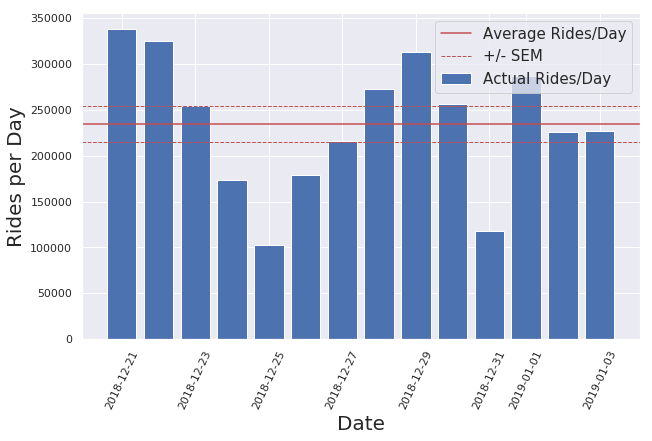

Average number of rides per day over the holiday season: 234714 +/- 19396
Average taken over 14 days


In [0]:
# Set how big to plot the figure below this cell showing rides per day.
plt.figure(figsize=(10,6))

# plot a histogram of rides per day
plt.bar(daily_counts['Date'], daily_counts['Daily_Count'], label='Actual Rides/Day')
plt.xticks(rotation=65)  # Rotate the x tick labels for readability

# Add labels to the x and y axes
plt.ylabel('Rides per Day', fontsize=20)
plt.xlabel('Date', fontsize=20)

# Plot the average as a horizontal red line
plt.axhline(y=avg_rides_per_day, xmin=0, xmax=1, c='r', label='Average Rides/Day')

# Overlay the average +/- SEM as red dashed lines
plt.axhline(y=avg_rides_per_day + sem_rides_per_day, xmin=0, xmax=1, c='r', linestyle='dashed', linewidth=1, label='+/- SEM')
plt.axhline(y=avg_rides_per_day - sem_rides_per_day, xmin=0, xmax=1, c='r', linestyle='dashed', linewidth=1)
plt.legend(fontsize=15)
plt.show()

# Print out the average number of rides per day and SEM
print(f'Average number of rides per day over the holiday season: {avg_rides_per_day:.0f} +/- {sem_rides_per_day:.0f}')
print(f'Average taken over {total_days:.0f} days')

Congratulations! You just made a model of rideshare usage over time! The solid red line in the plot above represents the average number of rides per day over the holiday period and the dashed red lines represent the Standard Error of the Mean (SEM). 

### Questions:

1. Above you've plotted the confidence interval of +/- SEM, what percentage confidence does this represent that the population mean lies within this interval?
2. What assumption must you make in order to use the SEM to assign a confidence interval as you did in question 1? Does it seem like a reasonable assumption?
2. What might you do to improve your model?

#### 2.3 Gather more data
One of the first things you might be curious about at this point is whether the holiday data is really representative of rideshare useage over different or longer time periods. More specfically, would rideshare usage look more consistent day to day in a different sample? And, is this average number of rides actually representative of the larger poulation? Indeed, one of the most common approaches to improving or better understanding your analytical results is to gather more data! 

In this case, you decide to gather a sampling of the full range of data from Nov. 1, 2018 to Mar. 31, 2019 again extracting just one out of every 500 records in the database to keep the data size manageable. This results in a new data set of around 90k records.

Run the next cell to read in a larger 90k sample spanning November to March.

In [0]:
# Read in a new dataset of ~90,000 randomly selected records
url = "https://raw.githubusercontent.com/ryan-keenan/Data-C4/master/rideshare_random90k.csv"
df_90k = pd.read_csv(url, parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

Run the next cell to have a look at the summary stats for this new data set

In [0]:
# Print out summary statistics for all columns
df_90k.describe()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Hour of Day
count,90672.000000,90676.000000,85319.000000,84726.000000,90676.000000,90676.000000,90676.000000,90676.000000,90676.000000,85373.000000,85373.000000,84780.000000,84780.000000,90676.000000,90676.000000,90676.000000
mean,1057.136426,5.896317,25.278062,25.852017,11.652115,0.592263,3.149938,15.394315,1.331874,41.892369,-87.665614,41.892893,-87.667463,2018.614551,5.691285,13.759131
std,760.117762,6.637229,20.161607,20.481237,9.297137,1.675231,1.942953,10.994334,0.808160,0.061346,0.059596,0.061435,0.063577,0.486704,4.653849,6.264701
min,4.000000,0.000000,1.000000,1.000000,0.000179,0.000000,0.000000,0.675863,1.000000,41.649347,-87.916910,41.648928,-87.916617,2018.000000,1.000000,0.000000
25%,525.000000,1.800000,8.000000,8.000000,5.897569,0.000000,2.550000,8.804728,1.000000,41.877561,-87.679571,41.877906,-87.681511,2018.000000,2.000000,9.000000
50%,858.000000,3.600000,24.000000,24.000000,8.667446,0.000000,3.000000,11.984502,1.000000,41.894045,-87.652326,41.893671,-87.651793,2019.000000,3.000000,15.000000
75%,1378.000000,7.300000,32.000000,32.000000,13.496252,0.000000,3.050000,17.301307,1.000000,41.929453,-87.631417,41.929999,-87.631409,2019.000000,11.000000,19.000000
max,37939.000000,208.300000,77.000000,77.000000,235.491361,62.500000,21.860000,248.615900,13.000000,42.023406,-87.533486,42.023003,-87.531590,2019.000000,12.000000,23.000000


#### 2.4 Calculate a new model based on the larger dataset

The first thing you'll do now is to compute the same model you did above for the holiday dataset, but now for the larger 90k sample. 

Run the cell below to calculate average rides per day for the 90k sample 

In [0]:
# First add a "Date" column to your dataframe by extracting the date from Trip Start Timestamp
df_90k['Date'] = df_90k['Trip Start Timestamp'].dt.floor('d')
# Create a new dataframe containing counts of rides by day
daily_counts_90k = df_90k.groupby('Date').size().reset_index(name='Daily_Count')
# Multiply daily counts by 500 to account for the fact that the data has been downsampled by this factor
daily_counts_90k['Daily_Count'] = daily_counts_90k['Daily_Count'] * 500
# Extract the total number of days in the dataset
total_days_90k = daily_counts_90k['Date'].count()
# Compute the average number of rides per day
avg_rides_per_day_90k = daily_counts_90k['Daily_Count'].mean()
# Compute the standard deviation of rides per day
std_rides_per_day_90k = daily_counts_90k['Daily_Count'].std()
# Compute the Standard Error of the Mean for rides per day
sem_rides_per_day_90k = daily_counts_90k['Daily_Count'].sem()

# Print out the new dataframe as well as average number of rides per day and SEM
print(f'Number of rides per day over the holiday season: {avg_rides_per_day_90k:.0f} +/- {sem_rides_per_day_90k:.0f}')
print(f'Average taken over {total_days_90k:.0f} days')
# Print out the first few rows of a dataframe containing actual daily ride counts
daily_counts_90k.head()

Number of rides per day over the holiday season: 300252 +/- 4843
Average taken over 151 days


,Date,Daily_Count
0,2018-11-01,300500
1,2018-11-02,322000
2,2018-11-03,375000
3,2018-11-04,325000
4,2018-11-05,242500


### Questions:
1. What do you notice immediately about the number of rides per day in the full data set compared to what you found for the holiday data?

#### 2.5 Plot the new dataset and compare your two calculations of average rides per day
Run the cell below to plot and print a comparison with your results from the holiday data.

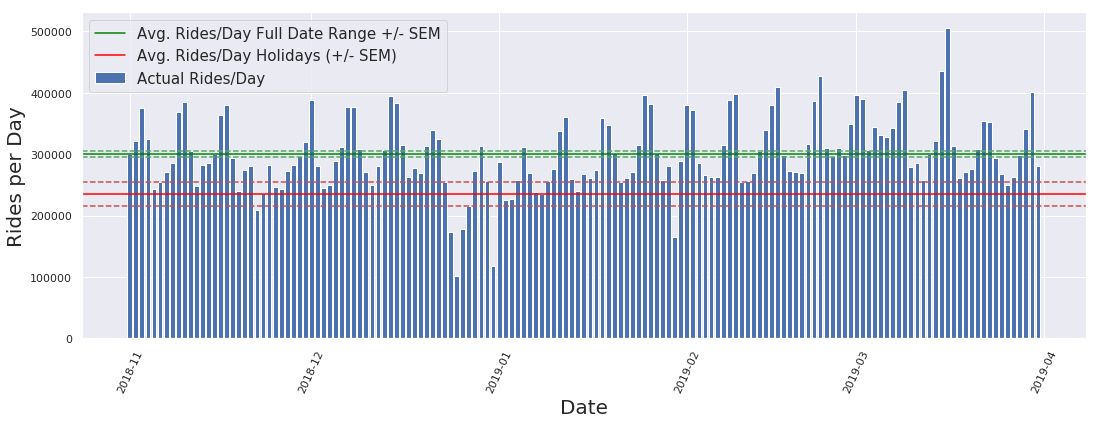

Average number of rides per day over the full date range: 300252 +/- 4843
Average taken over 151 days


In [0]:
# Set how big to plot the figure below this cell showing rides per day.
plt.figure(figsize=(18,6))

# Overwrite the plot to convert the y-axis to "rides per day" (multiplying by 500)
plt.bar(daily_counts_90k['Date'], daily_counts_90k['Daily_Count'], label='Actual Rides/Day')
plt.xticks(rotation=65)  # Rotate the x tick labels for readability

# Add labels to the x and y axes
plt.ylabel('Rides per Day', fontsize=20)
plt.xlabel('Date', fontsize=20)

# Plot the holidays and full date range averages as a horizontal red and green lines
plt.axhline(y=avg_rides_per_day_90k, xmin=0, xmax=1, c='green', label='Avg. Rides/Day Full Date Range +/- SEM')
plt.axhline(y=avg_rides_per_day, xmin=0, xmax=1, c='red', label='Avg. Rides/Day Holidays (+/- SEM)')

# Overlay the full dataset average +/- SEM as green dashed lines
plt.axhline(y=avg_rides_per_day_90k + sem_rides_per_day_90k, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
plt.axhline(y=avg_rides_per_day_90k - sem_rides_per_day_90k, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
# Overlay the holiday dataset average +/- SEM as red dashed lines
plt.axhline(y=avg_rides_per_day + sem_rides_per_day, xmin=0, xmax=1, c='r', linestyle='dashed', linewidth=1.5)
plt.axhline(y=avg_rides_per_day - sem_rides_per_day, xmin=0, xmax=1, c='r', linestyle='dashed', linewidth=1.5)

plt.legend(fontsize=15)
plt.show()

# Print out the average number of rides per day and standard error
print(f'Average number of rides per day over the full date range: {avg_rides_per_day_90k:.0f} +/- {sem_rides_per_day_90k:.0f}')
print(f'Average taken over {total_days_90k:.0f} days')

### Questions:
1. How does the average number of rides per day for the holiday period compare with the larger dataset? 
2. What can you conclude (and with what level of confidence) about the average number of rides per day over the holidays vs. the full range of dates from November to March?
3. What else do you notice about the five month data set when it's plotted as a histogram above? How many peaks do you count in the histogram? How many weekends are there betwen November 1, 2018 and March 31, 2019?
4. What steps would you suggest to create a model that does a better job of predicting the number of rides there will actually be on any given day?



#### 2.6 Calculate the average number of rides for each weekday.

***Recognizing periodicity:***

The peaks in the histogram of rides per day above represent the number of rides taken on the weekends. This regular periodic signal demonstrates that the demand for rides on weekends is consistently higher than the demand during the middle of the week. Now your job is to use that information to improve your model! 

Your original model (the flat line average shown above) was a simple average over all time. The average of a periodic signal (like the demand for rides as a function of day of the week) is a reasonable measurement to make when you are concerned with averaging over timespans much longer than the period of the signal. For example, if you just wanted to know the average number of rides per year, you wouldn't be bothered by the fact that there are more rides on weekends than weekdays. 

***A switch from predicting average rides over all time to rides for an individual day of the week***

In many cases, as an analyst you'll be calculating an average to be able to predict some future measure of the metric you're interested in. For example, if you're interested in knowing how many rides are likely to happen next year, you might take an average over the last several years as a way of predicting that value.

If instead you're interested in predicting the number of rides that will be taken next Monday, then your best bet would be to average a bunch of past Mondays to get your answer, because the number of rides per day depends strongly on which day of the week it is!

***A switch from SEM to standard deviation***

If all you are interested in is the mean of a population, then the SEM is the appropriate confidence interval to consider. If instead, you're interested in predicting a value for single sample, for example, the number of rides that will occur next Monday, then the standard deviation of the number of rides for all Monday makes sense as a confidence interval associated with that prediction.

In the model comparisons that follow, all confidence intervals will represent the standard deviation of the measurement being plotted.

***Compute your new model***

In the next code cell, you'll compute the average number of rides per day for each day of the week and the standard deviation associated with each average.

Prepare yourself, the next cell contains some mind-bending Python code. There's a lot going on here but the important thing to understand is that you're calculating the average number of rides for each weekday and the standard deviation associated with that average.

In [0]:
# Start by creating a list of the days of the week
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Add a column called
daily_counts_90k['Weekday'] = daily_counts_90k['Date'].apply(lambda x: weekdays[x.weekday()])
# Create a new dataframe with number of rides per weekday and number of occurences of each weekday
weekday_summary = pd.DataFrame(
    {
        'Weekday': weekdays,
        'Day_Count': [df_90k.loc[df_90k['Weekday']==day,'Trip Start Timestamp'].apply(lambda x: x.date()).nunique() for day in weekdays],
        'Avg_Ride_Count': daily_counts_90k.groupby('Weekday').mean().loc[weekdays,'Daily_Count'],
        'StDev_Ride_Count': daily_counts_90k.groupby('Weekday').std().loc[weekdays,'Daily_Count']
    }
).set_index('Weekday')
# Print out the summary dataframe of average number of rides per weekday
weekday_summary

,Day_Count,Avg_Ride_Count,StDev_Ride_Count
Weekday,,,
Monday,21,251785.714286,43696.559198
Tuesday,21,262785.714286,42310.037647
Wednesday,21,267690.476190,38000.156641
Thursday,22,296045.454545,37414.317698
Friday,22,354113.636364,48397.149616
Saturday,22,375931.818182,45826.093486
Sunday,22,288022.727273,22972.798238


### Questions:
1. How many rides total occurred on a Monday in this data set? How many on a Thursday?
2. How many unique Tuesdays were there in the data set? How many Fridays?

#### 2.7 Plot your new model to predict counts and confidence for each day of the week
Now that you have recognized that the demand for rides fluctuates periodically on a weekly basis, and you have computed the actual demand for rides (total for each day) and how much it changes from week to week (the standard deviation) you're ready to create a new model! 

Run the next cell to convert your counts of rides and days into an estimate of rides per day and error.

Run the next cell to plot your new model against the data.

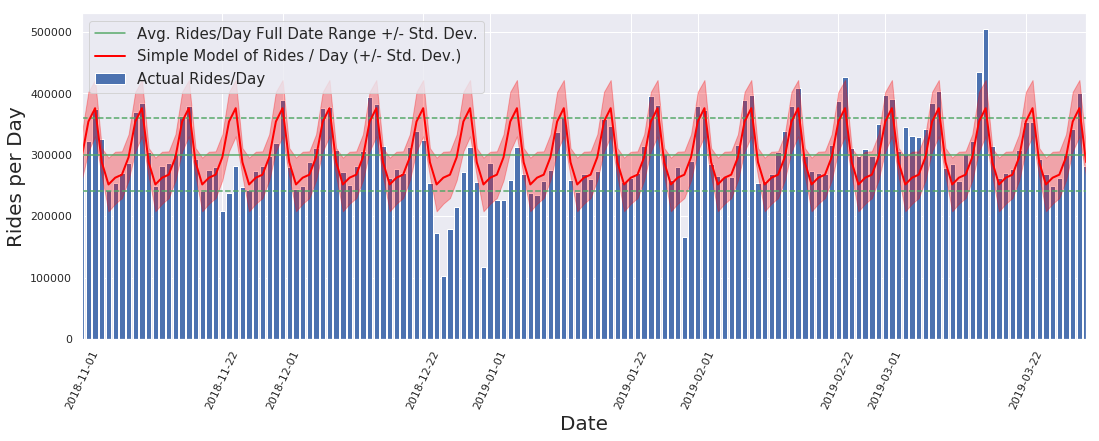

In [0]:

# Extract a multi-week model from the ride_counts dataframe (starting on a Thursday)
one_week_model = list(weekday_summary['Avg_Ride_Count'].values)
weekday_rides_model = np.array(one_week_model[3:] + 21*one_week_model)
one_week_error = list(weekday_summary['StDev_Ride_Count'].values)
weekday_rides_error = np.array(one_week_error[3:] + 21*one_week_error)
# Create a figure to display the model against actual rides per day
plt.figure(figsize=(18, 6))

# Overwrite the plot to convert the y-axis to "rides per day" (multiplying by 500)
plt.bar(daily_counts_90k['Date'], daily_counts_90k['Daily_Count'], label='Actual Rides/Day')

# Plot the full date range average as a horizontal red line
plt.axhline(y=avg_rides_per_day_90k, xmin=0, xmax=1, c='g', label='Avg. Rides/Day Full Date Range +/- Std. Dev.')
# Overlay the full dataset average +/- Standard Dev. as green dashed lines
plt.axhline(y=avg_rides_per_day_90k + std_rides_per_day_90k, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
plt.axhline(y=avg_rides_per_day_90k - std_rides_per_day_90k, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)

plt.plot(daily_counts_90k['Date'], weekday_rides_model, color='red', linewidth=2, label='Simple Model of Rides / Day (+/- Std. Dev.)')
plt.fill_between(daily_counts_90k['Date'], weekday_rides_model-weekday_rides_error, weekday_rides_model+weekday_rides_error, color='red', alpha=0.3, zorder=2)
plt.xticks(rotation=65)  # Rotate the x tick labels for readability
plt.ylabel('Rides per Day', fontsize=20)
plt.xlabel('Date', fontsize=20)
# Set the limits of the x-axis to any date range (default is the full range)
plt.xlim(pd.Timestamp('2018-11-1'), pd.Timestamp('2019-3-31'))
plt.legend(fontsize=15)
plt.show()

**Congratulations!** You have significantly improved your model! In the plot above, your average rides per day value for each day of the week is shown in red with a margin of error of +/- one standard deviation.  

The blue bars represent actual demand for rides over each day in this time period and everywhere that your model in red is overlapping with the tops of the blue bars, you are predicting the correct number of rides (to within your margin of error). Just by calculating this simple average demand for rides over each day of the week you have created a powerful predictive model that captures the dynamic nature of your data!

#### 2.8 Investigate anomalies
Also immediately obvious in the plot above are some areas where the actual demand does not match the model. As an analyst, you are equally excited by the places where your model fails as where it succeeds! 

<img src="https://pathstream-data-analytics.s3-us-west-2.amazonaws.com/rides_per_day_model.png" width=600 alt="Drawing" style="width: 200px;"/>

You can see clearly that the holiday period (Dec. 21, 2018 - Jan. 3, 2019), which you investigated previously, has a lower overall demand for rides than any other time period in the data set. But what about those other departures from the model? 

To zoom in on specfic parts of the plot above, and see clearly which days represent discrepancies with your model, change the date range in the following line of code:
```python
# Set the limits of the x-axis to any date range (default is the full range)
plt.xlim(pd.Timestamp('2018-11-1'), pd.Timestamp('2019-3-31'))
```
The defaults of Nov. 1 and Mar. 31 represent the first and last dates in the data set but you can change these to any other dates you like to zoom in on a section of the plot. Change these dates and investigate the following questions:

1. What would you expect is the reason for the low demand in late November?
2. What about that spike in mid-March? What might you guess is driving higher demand there?
3. Strangest of all, what is that one-day dip in late January? (here's [a tip](https://www.weather.gov/lot/RecordColdJan2019) if you get stumped!)
4. What would you suggest as improvements you could make to your model of rides per day to improve its accuracy to better accommodate these days or weeks when the average model doesn't fit?

### Objective 3: Create an hourly model of rideshare usage.

#### 3.1 Extract a subset of data where your weekday model fits well.
You have done a fine job so far of creating a model that predicts the number of rides per day for each day of the week. Now the city wants you to improve the time resolution of your model to predict rides per hour throughout each day as well!

<img src="https://pathstream-data-analytics.s3-us-west-2.amazonaws.com/early_dec_rides.png" width=600 alt="Drawing" style="width: 200px;"/>


There are two weeks in December where your model appears to be a particlarly good fit (Dec. 3 - 16 shown above), so you select those dates to take a closer look. This data set spans two weeks from a Monday to a Sunday. Your next step is to extract this subset of data to investigate how your model fits when you increase the time resolution to hourly.

Run the next cell to extract the two week data set from early Dec., 2018.


In [0]:
# Set the start date/time as the first timestamp in the dataframe
start_timestamp = pd.Timestamp(2018, 12, 3, 0)
# Set the end date/time as the last timestamp in the dataframe
end_timestamp = pd.Timestamp(2018, 12, 17, 0)
# Extract a new dataframe that only includes two weeks of data in early February
df_dec = df_90k[df_90k['Trip Start Timestamp'] > start_timestamp] 
df_dec = df_dec[df_dec['Trip Start Timestamp'] < end_timestamp]

#### 3.2 Extract hourly ride counts from your subset of data
Run the next cell to count rides by the hour over the two week sample you extracted above.

In [0]:
# Create a separate dataframe of rides per hour
hourly_counts = df_dec.groupby(['Date', 'Hour of Day']).size().reset_index(name='Hourly_Count')
# Multiply by downsampling factor to get to actual rides per hour
hourly_counts['Hourly_Count'] = hourly_counts['Hourly_Count']*500
# Create a column of timestamps centered on each hourly bin used for counting
add_interval = np.timedelta64(30, 'm')
hourly_counts['Bin_Center_Timestamp'] = df_dec['Trip Start Timestamp'].apply(lambda x: np.datetime64(x.strftime('%Y-%m-%d %H'))+add_interval).sort_values().unique()
hourly_counts.head(10)

,Date,Hour of Day,Hourly_Count,Bin_Center_Timestamp
0,2018-12-03,0,2000,2018-12-03 00:30:00
1,2018-12-03,1,3500,2018-12-03 01:30:00
2,2018-12-03,2,3500,2018-12-03 02:30:00
3,2018-12-03,3,1000,2018-12-03 03:30:00
4,2018-12-03,4,3500,2018-12-03 04:30:00
5,2018-12-03,5,3000,2018-12-03 05:30:00
6,2018-12-03,6,11000,2018-12-03 06:30:00
7,2018-12-03,7,14500,2018-12-03 07:30:00
8,2018-12-03,8,17500,2018-12-03 08:30:00
9,2018-12-03,9,12500,2018-12-03 09:30:00


#### 3.3 Create a new model by converting your daily model to its hourly equivalent

Run the next cell to take your daily rides model and make an hourly prediction by simply dividing daily rides by 24 (assuming an equal number of rides for each hour of the day)

In [0]:
# Create lists to model values for every hour model and error
# Loop over the values for daily rides and error for each day of the week
# Note: the *24 at the end actually replicates each value 24 times a list rather than multiplying the value inside the brackets by 24
oneweek_hourly_model = [[daily_rides/24] * 24 for daily_rides in weekday_summary['Avg_Ride_Count'].values]
oneweek_hourly_error = [[daily_err/24] * 24 for daily_err in weekday_summary['StDev_Ride_Count'].values]

# Take the one week model and replicate it twice (list*2) and convert to a numerical array
avg_hourly_model = np.array(oneweek_hourly_model*2).ravel()
avg_hourly_error = np.array(oneweek_hourly_error*2).ravel()

#### 3.4 Plot your new hourly model against hourly ride counts from the two week subsample
Great! Now you have converted your daily rides model into its hourly equivalent. 

Run the next cell to plot actual counts per hour vs. your new model.

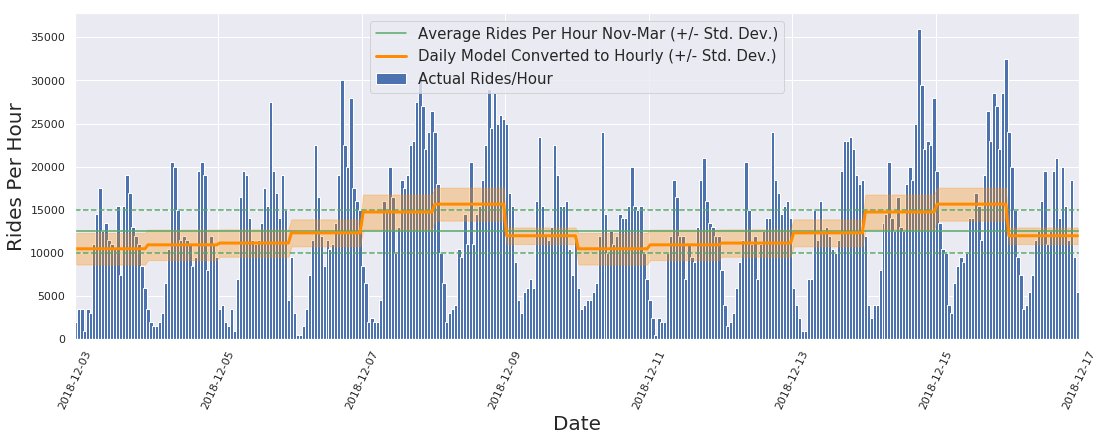

In [0]:
# Plot a histogram from start to end date binned by hour
plt.figure(figsize=(18,6))
# Plot a bar chart (histogram) of rides per hour
plt.bar(hourly_counts['Bin_Center_Timestamp'], hourly_counts['Hourly_Count'], width=0.05, label='Actual Rides/Hour')
# Overplot the average rides per hour (dividing rides per day by 24)
plt.axhline(y=avg_rides_per_day_90k/24, xmin=0, xmax=1, c='g', linewidth=1.5, label='Average Rides Per Hour Nov-Mar (+/- Std. Dev.)')
plt.axhline(y=avg_rides_per_day_90k/24 + std_rides_per_day_90k/24, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
plt.axhline(y=avg_rides_per_day_90k/24 - std_rides_per_day_90k/24, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
# Overplot the your new avg_hourly_model
plt.plot(hourly_counts['Bin_Center_Timestamp'], avg_hourly_model, color='darkorange', linewidth=3, label='Daily Model Converted to Hourly (+/- Std. Dev.)')
plt.fill_between(hourly_counts['Bin_Center_Timestamp'], avg_hourly_model-avg_hourly_error, avg_hourly_model+avg_hourly_error, color='darkorange', alpha=0.3, zorder=2)
plt.xticks(rotation=65) # Rotate the x tick labels for readability
plt.ylabel('Rides Per Hour', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(fontsize=15)
# Set the limits of the x-axis to any date range (default is the full range)
# The format for generating these timestamps is pd.Timestamp(YYYY, MM, DD, hour)
plt.xlim(pd.Timestamp(2018, 12, 3, 0), pd.Timestamp(2018, 12, 17, 0))
plt.show()

### Questions:
1. What do you notice now about your model when compared to hourly ride counts? Does it still look like a good fit?
2. What sort of periodicities do you now observe in the data?

### Zoom in to get the details
Just like you did before, you can take a closer look by zooming in on the data. To do this, change the limits of the x-axis by changing the timestamps in the following line of code:
```python
# Set the limits of the x-axis to any date range (default is the full range)
# The format for generating these timestamps is pd.Timestamp(YYYY, MM, DD, hour)
plt.xlim(pd.Timestamp(2018, 12, 3, 0), pd.Timestamp(2018, 12, 17, 0))
```
### Questions (after zooming in on a couple days):
1. How many peaks typically occur in any given day? What time of day do these peaks correspond to? Why do you think this occurs?
2. What would be your approach to improving your model?

#### 3.5 Make a better hourly model

In the plot above, you can see that simply dividing daily counts by 24 is not going to cut it as an hourly model. Again you see periodicity, so as the simplest possible approach you will now do the same thing you did to estimate the demand for rides as a function of day of the week, but this time for hour of the day. Also, you won't forget about what you learned from the daily rides analysis. You'll fold in the dependence on weekday into your hourly estimates as well!

Run the next cell to compute your new hourly model by extracting counts per hour over the entire 90k sample.

In [0]:
# Create a separate dataframe of rides per hour
hourly_counts_90k = df_90k.groupby(['Date', 'Hour of Day']).size().reset_index(name='Hourly_Count')
# Multiply by downsampling factor to get to actual rides per hour
hourly_counts_90k['Hourly_Count'] = hourly_counts_90k['Hourly_Count'] * 500
# Create a column of timestamps centered on each hourly bin used for counting
add_interval = np.timedelta64(30, 'm')
hourly_counts_90k['Bin_Center_Timestamp'] = df_90k['Trip Start Timestamp'].apply(lambda x: np.datetime64(x.strftime('%Y-%m-%d %H'))+add_interval).sort_values().unique()
hourly_counts_90k.head(10)

,Date,Hour of Day,Hourly_Count,Bin_Center_Timestamp
0,2018-11-01,0,10500,2018-11-01 00:30:00
1,2018-11-01,1,7500,2018-11-01 01:30:00
2,2018-11-01,2,3000,2018-11-01 02:30:00
3,2018-11-01,3,5000,2018-11-01 03:30:00
4,2018-11-01,4,1500,2018-11-01 04:30:00
5,2018-11-01,5,5000,2018-11-01 05:30:00
6,2018-11-01,6,7000,2018-11-01 06:30:00
7,2018-11-01,7,17000,2018-11-01 07:30:00
8,2018-11-01,8,16000,2018-11-01 08:30:00
9,2018-11-01,9,16000,2018-11-01 09:30:00


In [0]:
# Create a hourly rides summary by computing the average rides and standard deviation for each hour of the day
hourly_summary = pd.DataFrame({
    'unique_hour_counts': hourly_counts_90k.groupby('Hour of Day').agg('count')['Date'],
    'Avg_Ride_Count': hourly_counts_90k.groupby('Hour of Day').sum()['Hourly_Count']/total_days_90k,
    'StDev_Ride_Count': hourly_counts_90k.groupby('Hour of Day').std()['Hourly_Count']
})
# Print out your hourly summary
hourly_summary

,unique_hour_counts,Avg_Ride_Count,StDev_Ride_Count
Hour of Day,,,
0,151,9728.476821,6809.242518
1,151,7185.430464,6614.281491
2,147,4917.218543,4608.187582
3,144,3417.218543,2930.428738
4,151,3298.013245,1749.455923
5,150,4105.960265,1672.584572
6,150,7000.000000,2858.137251
7,151,11721.854305,5252.820119
8,151,15655.629139,6624.747902


#### 3.6 Plot your new model against two weeks of hourly counts data
Run the next cell to shape your hourly results into a model for plotting

In [0]:
# Convert lists to numerical arrays and multiply by 500 (downsampling factor)
# Divide total hourly ride counts by the number of days in the 90k sample
hourly_rides = hourly_summary['Avg_Ride_Count']
hourly_rides_error = hourly_summary['StDev_Ride_Count']

# Loop through each day of the week creating a model by multiplying avg_hourly_rides and error by the conversion factor derived from the daily model
oneweek_hourly_model = np.array([hourly_rides*weekday_summary.loc[weekday, 'Avg_Ride_Count']/avg_rides_per_day_90k for weekday in weekdays]).ravel()
oneweek_hourly_error = np.array([hourly_rides_error*weekday_summary.loc[weekday, 'Avg_Ride_Count']/avg_rides_per_day_90k for weekday in weekdays]).ravel()

# Create a twoweek_hourly_model by replicating the array twice.
twoweek_hourly_model = np.tile(oneweek_hourly_model, 2)
twoweek_hourly_error = np.tile(oneweek_hourly_error, 2)

Run the next cell to plot up your new model for comparison!

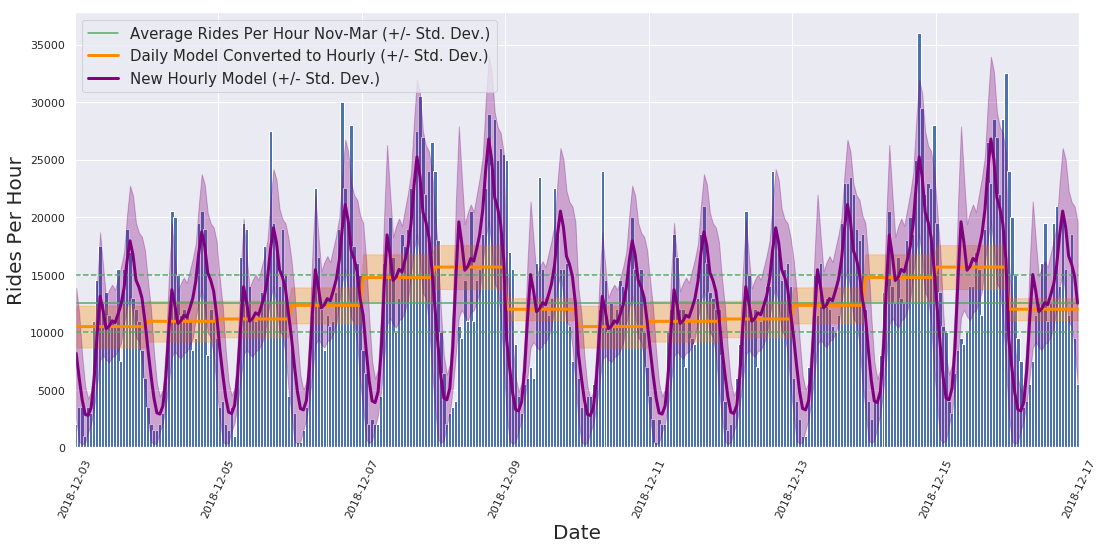

In [0]:
# Plot a histogram from start to end date binned by hour
plt.figure(figsize=(18,8))
# Plot a bar chart (histogram) of rides per hour
plt.bar(hourly_counts['Bin_Center_Timestamp'], hourly_counts['Hourly_Count'], width=0.05)
# Overplot the average rides per hour (dividing rides per day by 24)
plt.axhline(y=avg_rides_per_day_90k/24, xmin=0, xmax=1, c='g', linewidth=1.5, label='Average Rides Per Hour Nov-Mar (+/- Std. Dev.)')
plt.axhline(y=avg_rides_per_day_90k/24 + std_rides_per_day_90k/24, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
plt.axhline(y=avg_rides_per_day_90k/24 - std_rides_per_day_90k/24, xmin=0, xmax=1, c='g', linestyle='dashed', linewidth=1.5)
# Overplot the your new avg_hourly_model
plt.plot(hourly_counts['Bin_Center_Timestamp'], avg_hourly_model, color='darkorange', linewidth=3, label='Daily Model Converted to Hourly (+/- Std. Dev.)')
plt.fill_between(hourly_counts['Bin_Center_Timestamp'], avg_hourly_model-avg_hourly_error, avg_hourly_model+avg_hourly_error, color='darkorange', alpha=0.3, zorder=2)

# Overplot your new twoweek_hourly_model
plt.plot(hourly_counts['Bin_Center_Timestamp'], twoweek_hourly_model, color='purple', linewidth=3, label='New Hourly Model (+/- Std. Dev.)')
plt.fill_between(hourly_counts['Bin_Center_Timestamp'], 
                 twoweek_hourly_model-twoweek_hourly_error, 
                 twoweek_hourly_model+twoweek_hourly_error, 
                 color='purple', 
                 alpha=0.3, 
                 zorder=2)
plt.xticks(rotation=65) # Rotate the x tick labels for readability
plt.ylabel('Rides Per Hour', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(loc='upper left', fontsize=15)
# Set the limits of the x-axis to any date range (default is the full range)
# The format for generating these timestamps is pd.Timestamp(YYYY, MM, DD, hour)
plt.xlim(pd.Timestamp(2018, 12, 3, 0), pd.Timestamp(2018, 12, 17, 0))
plt.show()

**Well done!** Very Impressive, you now have a model of the demand for rides at each hour of the day for each day of the week (in purple above)! As you can see, your model isn't perfect, but it does a better job of modeling hourly ride counts than either a flat average over many days (green) or a per-day average (orange). Now you are able to present the city of Chicago with a model that does a reasonable job of predicting the number of rides to expect on average for any day of the week and any hour of the day. You accomplished all of this without any fancy or complicated modeling, only simple averages and standard deviations. Nice work!

### Questions:
1. Where does your model seem to fit well? Where does it not fit so well?
2. At this point, what kind of approach might you take to improving your model?

To investigate your model fit more closely, you can again zoom in to view individual days by changing the limits on the x-axis with this line of code:
```python
# Set the limits of the x-axis to any date range (default is the full range)
# The format for generating these timestamps is pd.Timestamp(YYYY, MM, DD, hour)
plt.xlim(pd.Timestamp(2018, 12, 3, 0), pd.Timestamp(2018, 12, 17, 0))
```

# Congratulations! You've come to the end of this notebook!

Great job carrying out this exploratory analysis of the Chicago rideshare dataset. You now have a wealth of insights to present regarding the statistics of rides in Chicago and key metrics that affect drivers. Write up your results along with any supporting figures you would like to use from this notebook or your work in Google sheets. 